# Test_Pipeline_v1.0

    日期：2020/4/4
    负责人：黄宗源

    目录
    1. trend_preprocess
    2. trend_qualified
    3. trend_dataset

***注意：在Price_Trend目录下测试，确保路径正确性***

In [1]:
from trend_preprocess import trend_preprocess
from trend_qualified import trend_qualified
from trend_dataset import trend_dataset

In [2]:
data_input_path = '../../../Data/Price_System/Price_Predict/raw/house/used_house_data.csv'
parameter_path  = './innerdata/parameter.txt'
data_qualified_path = '../../../Data/Price_System/Price_Trend/qualified/house/used_house_data_qualified.csv'
dataset_path = '../../../Data/Price_System/Price_Trend/dataset/'
index_path = './innerdata/index.csv'

### 1. trend_preprocess

**当parameter.txt不存在时**

(56126, 35)


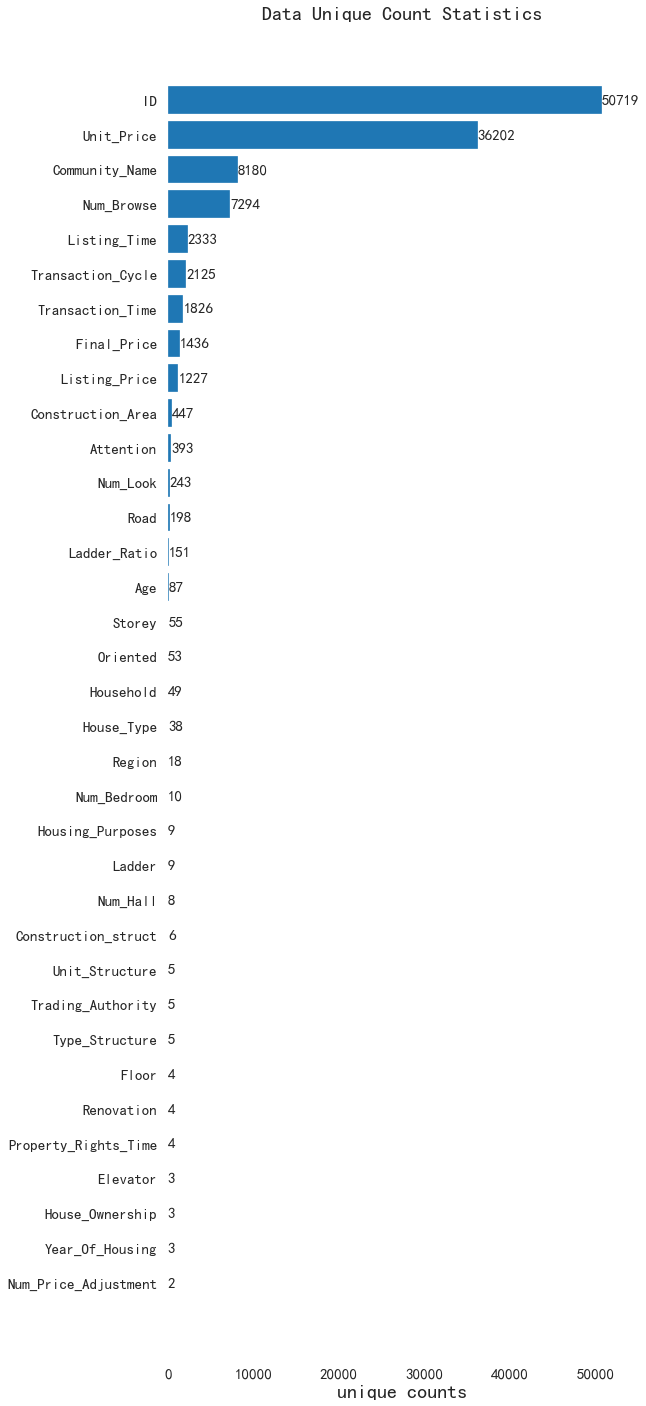

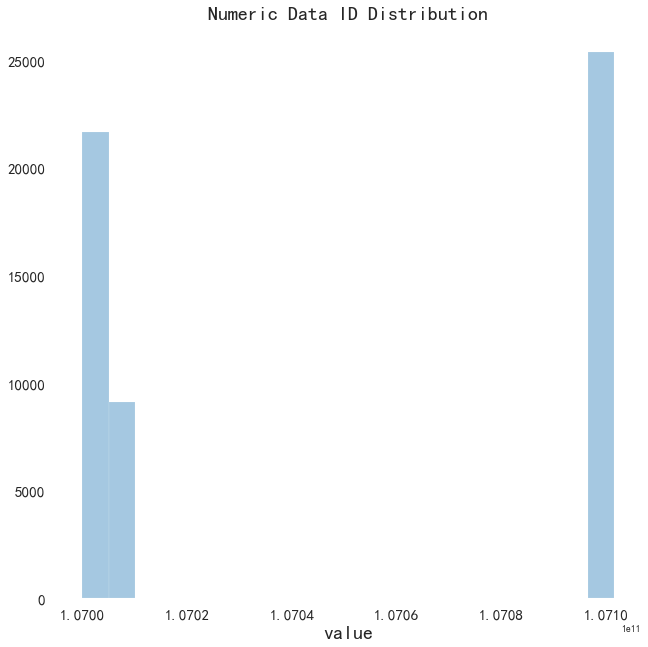

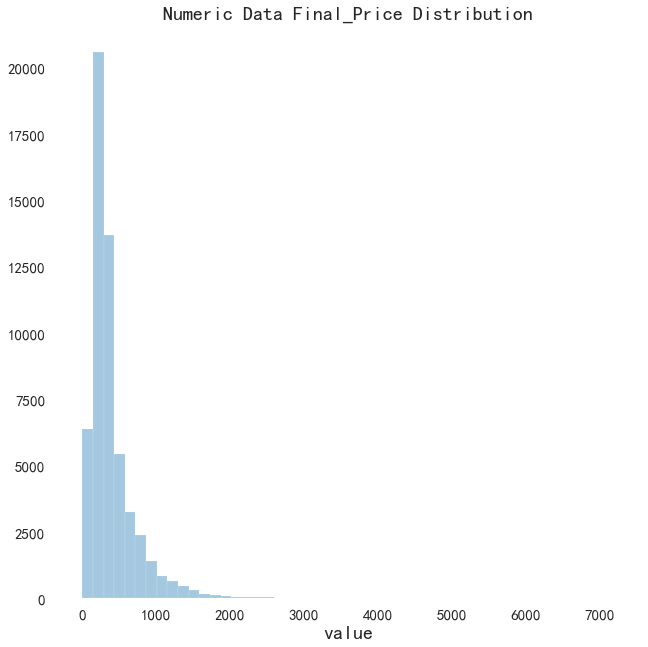

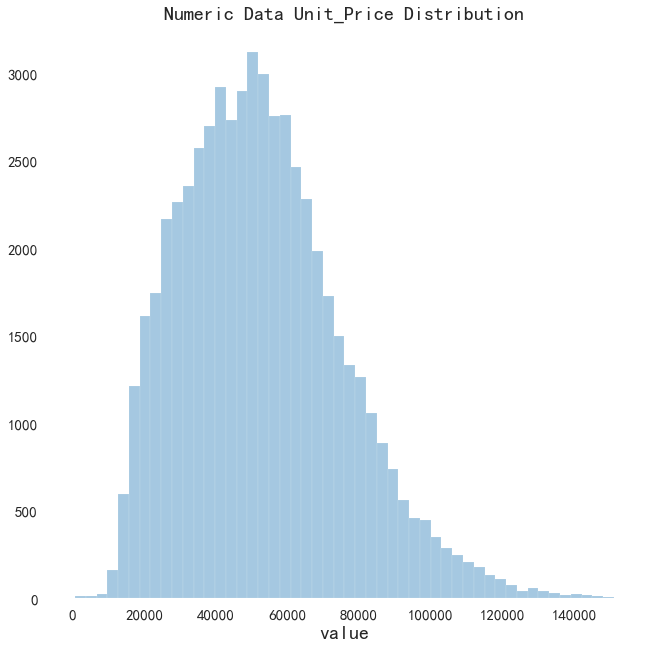

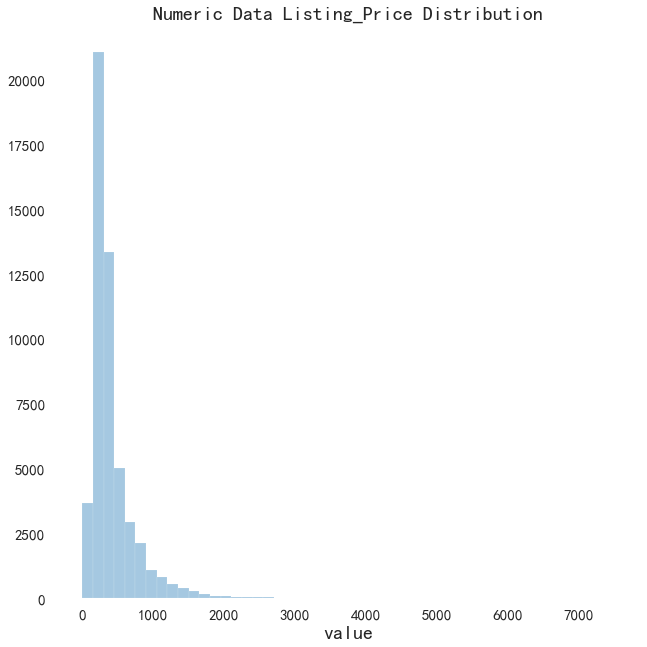

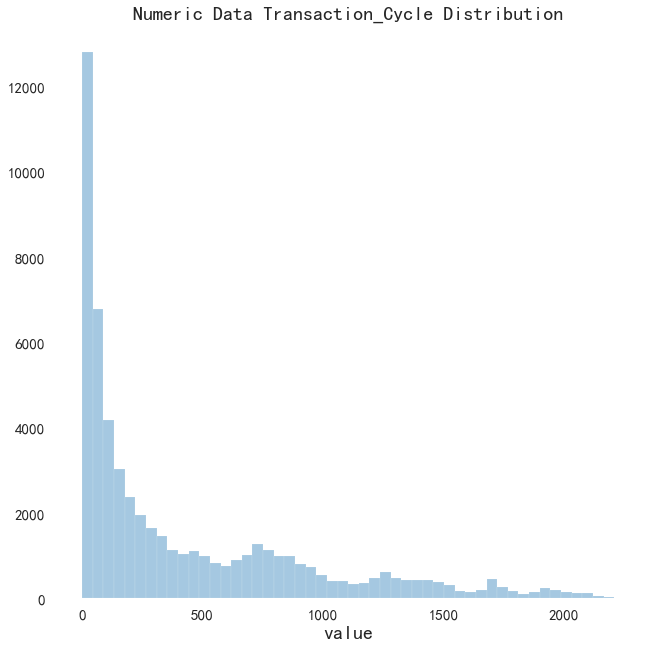

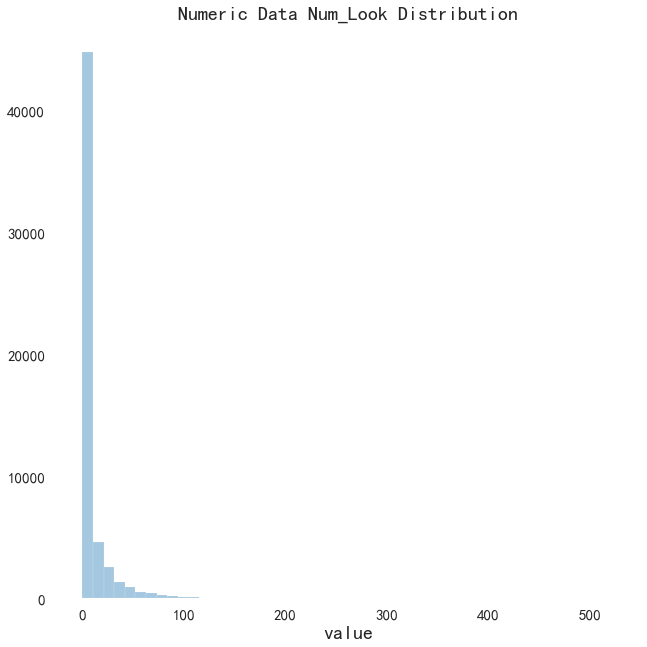

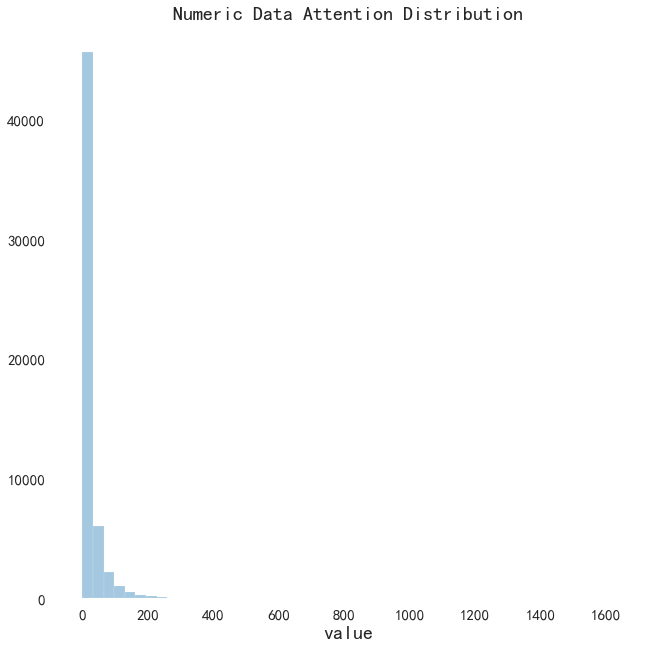

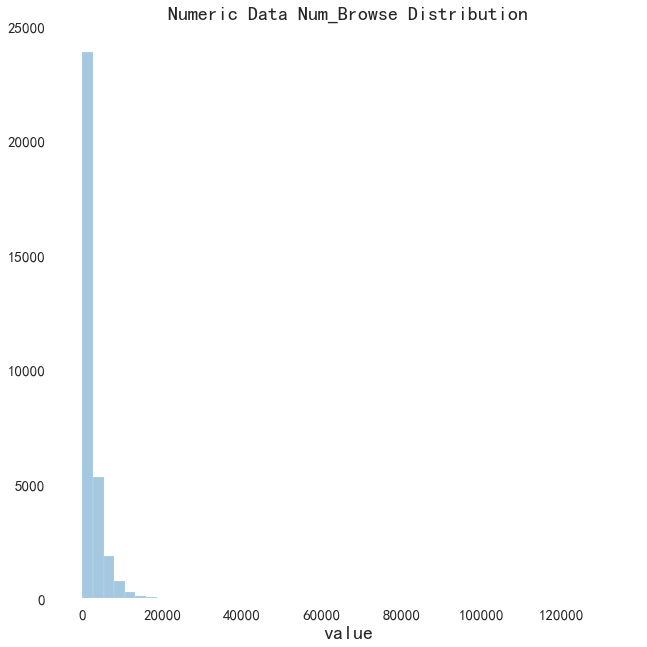

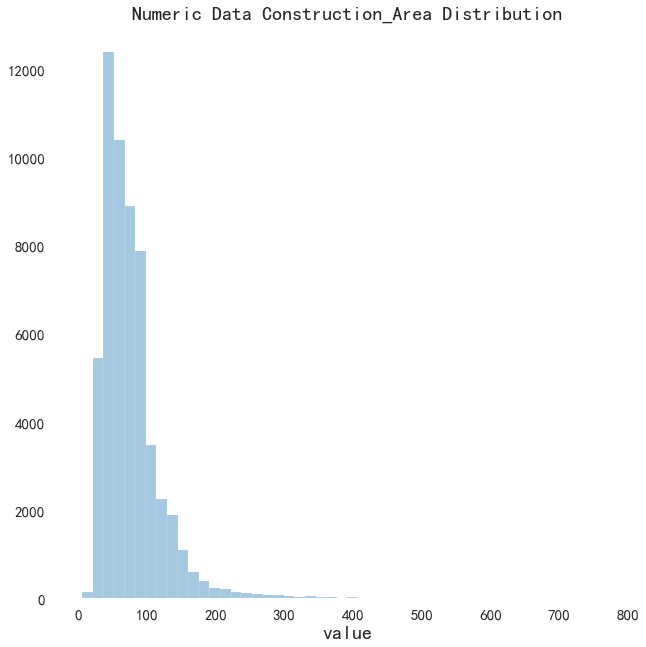

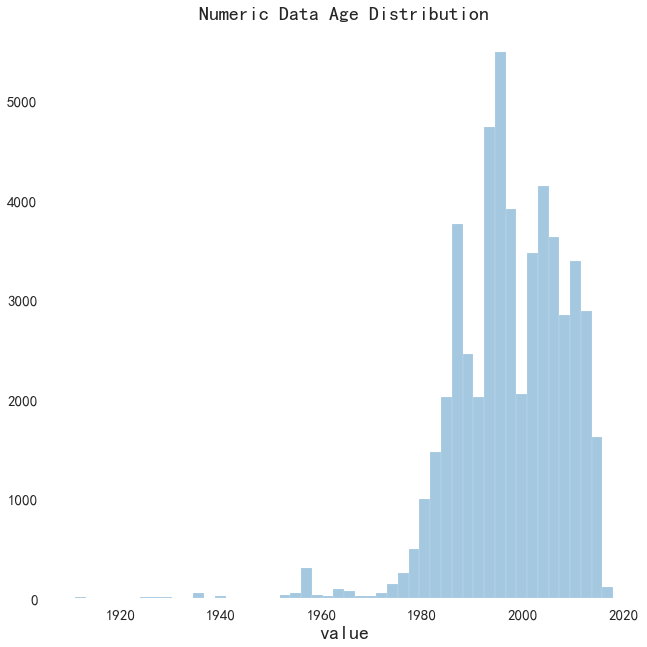

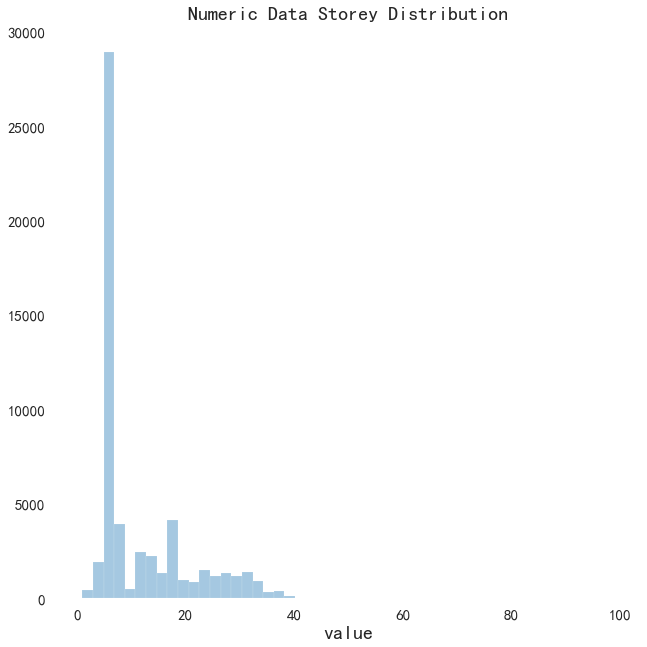

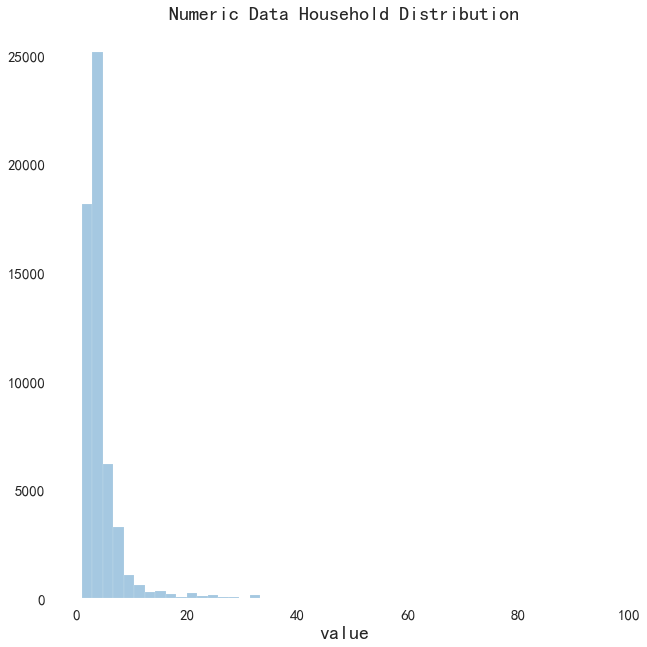

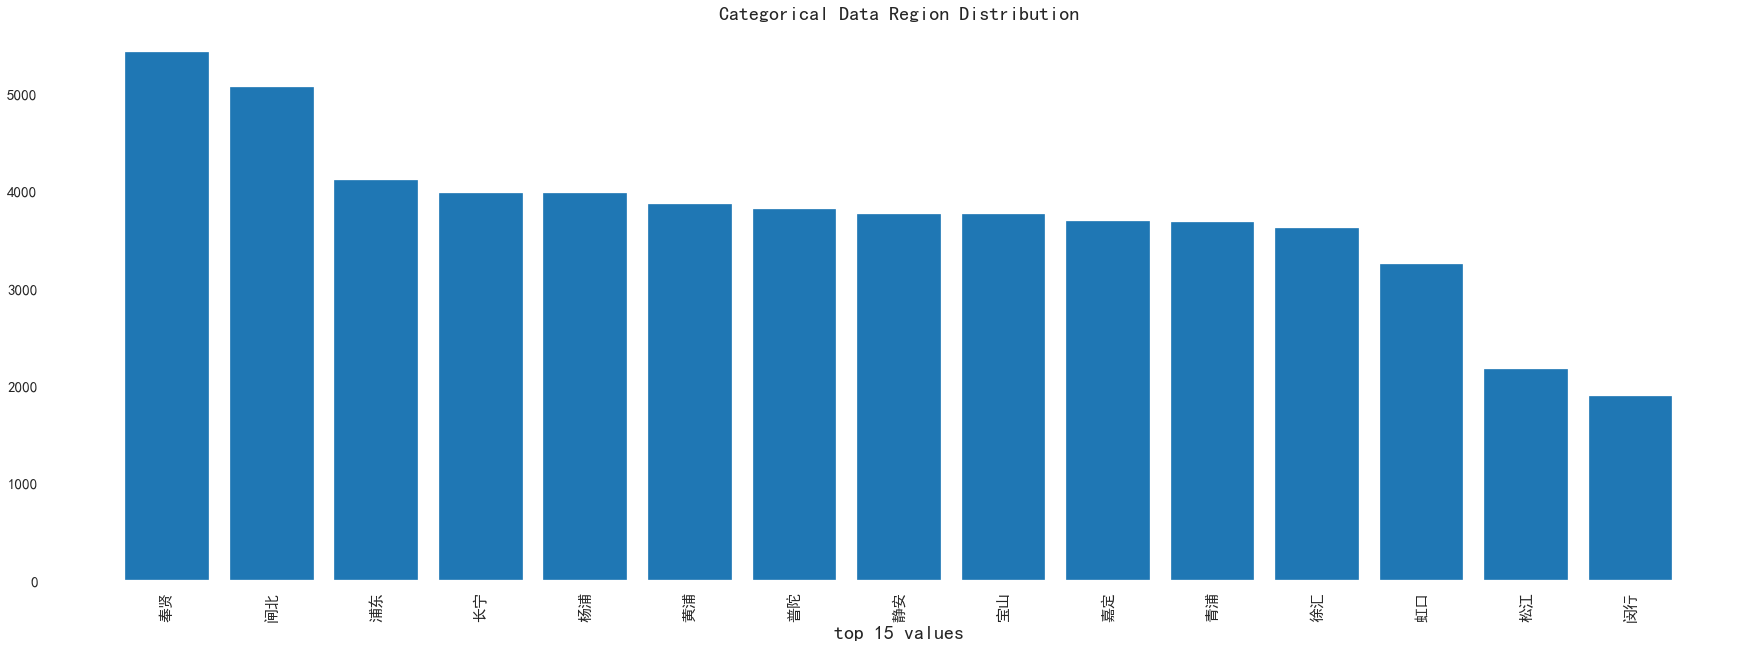

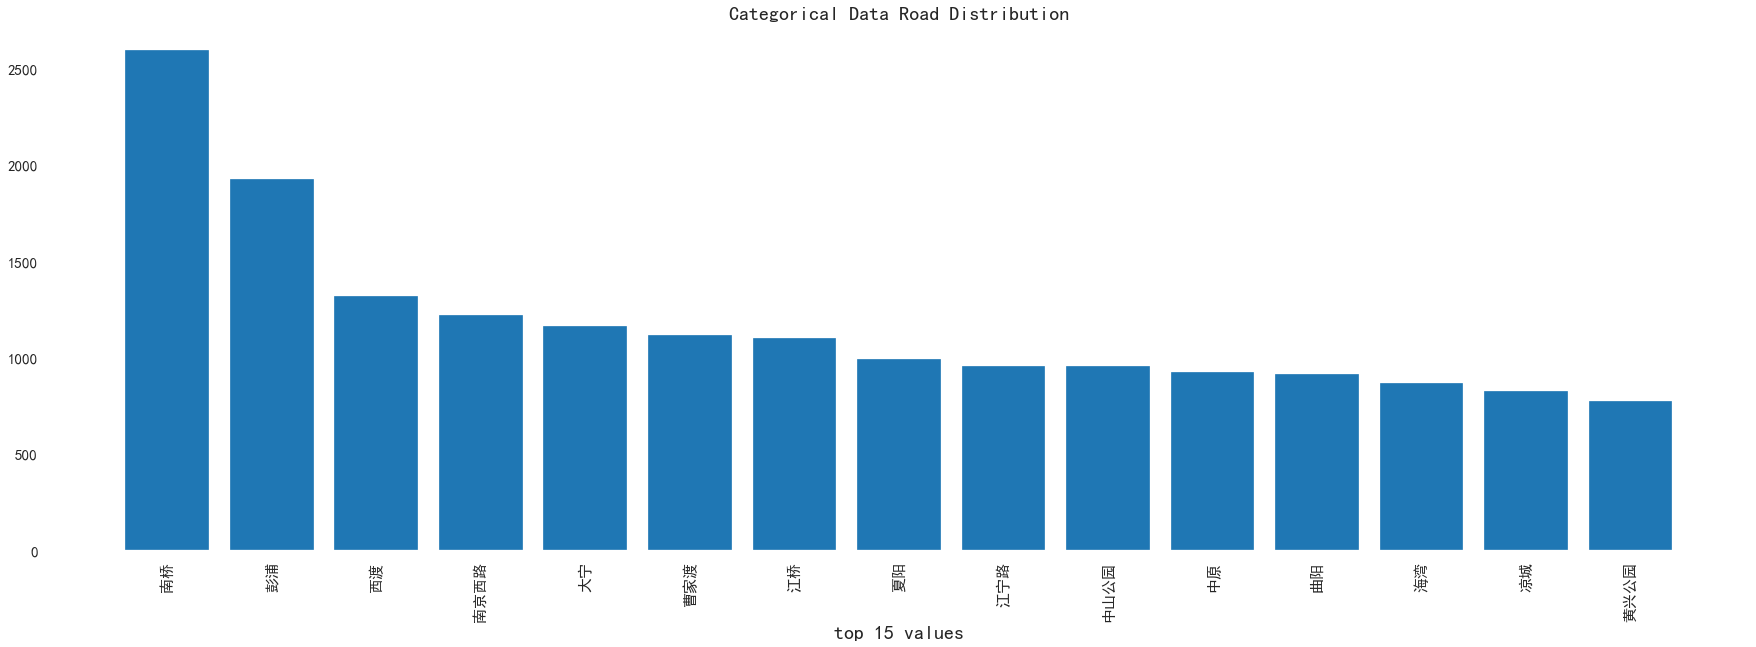

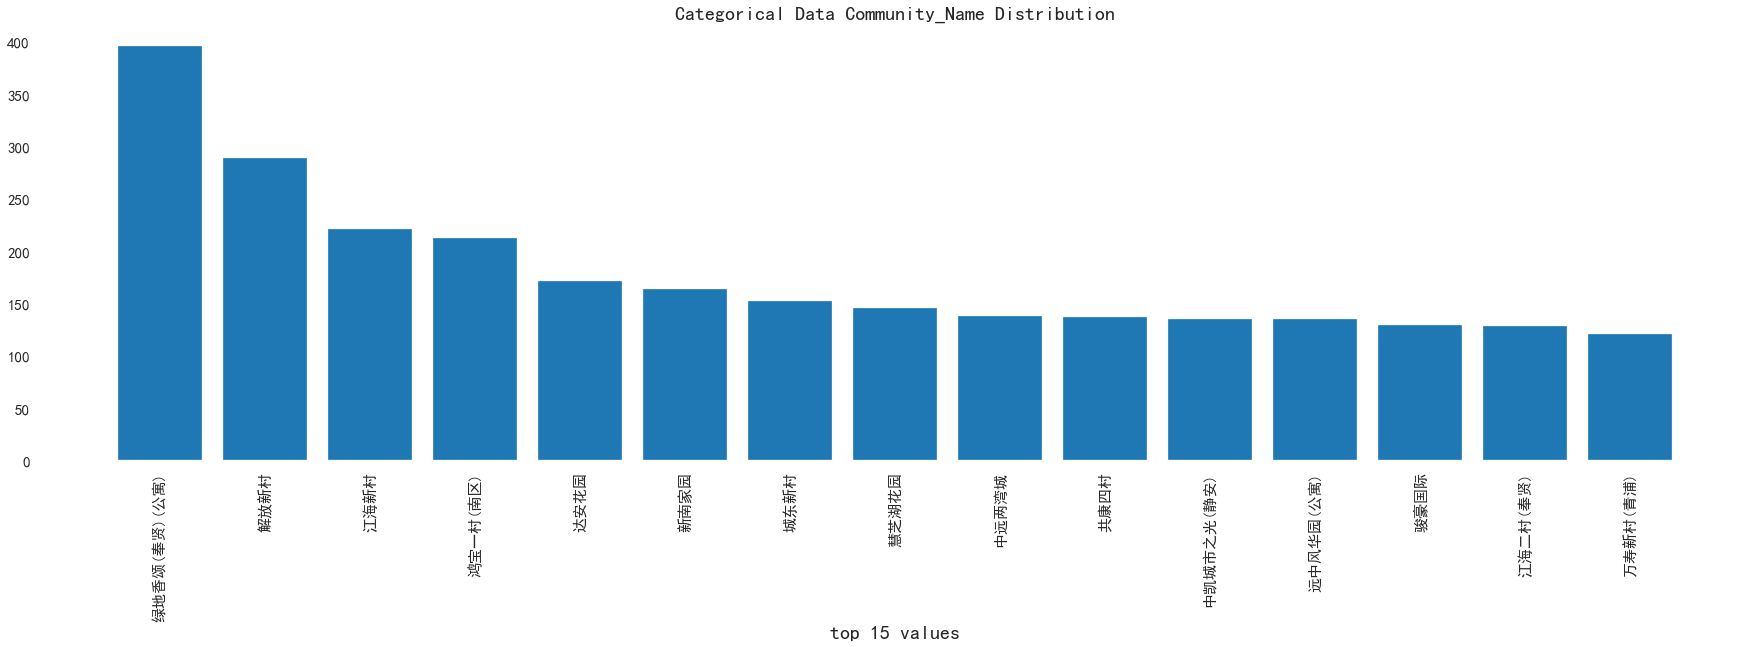

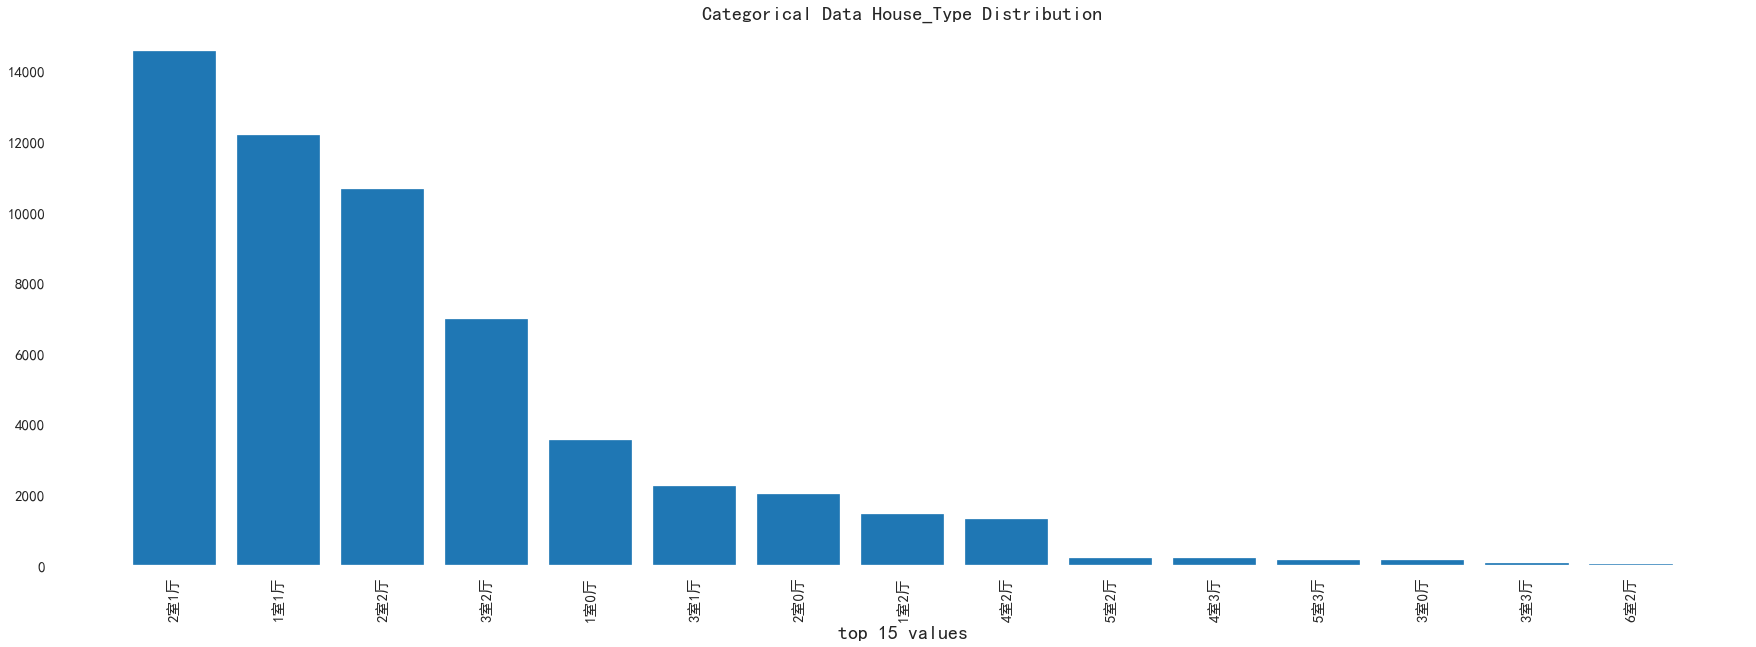

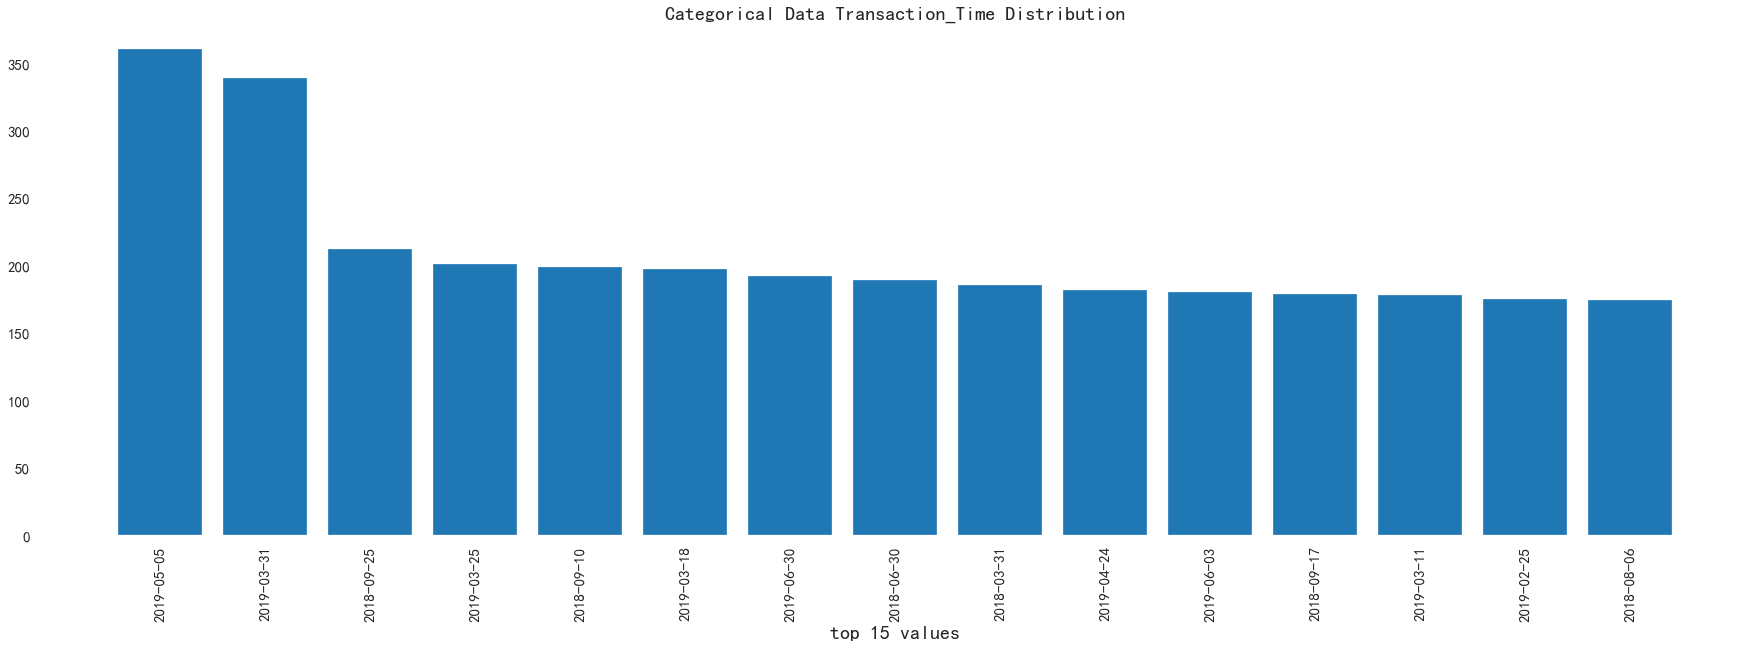

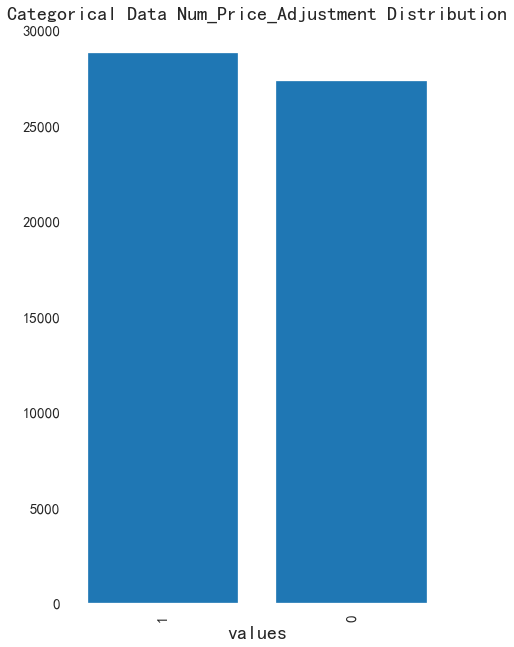

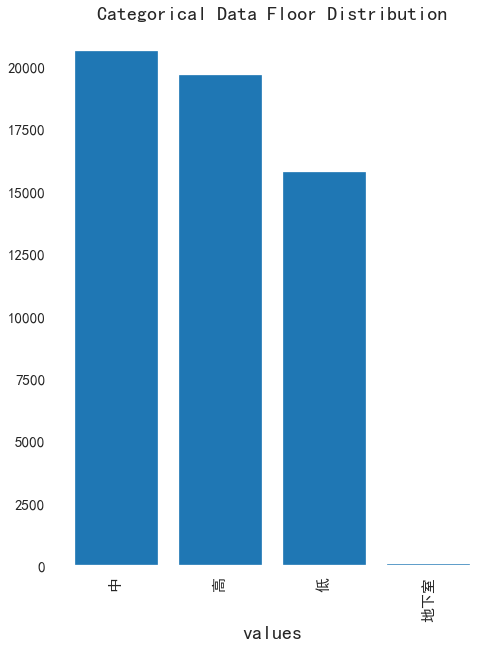

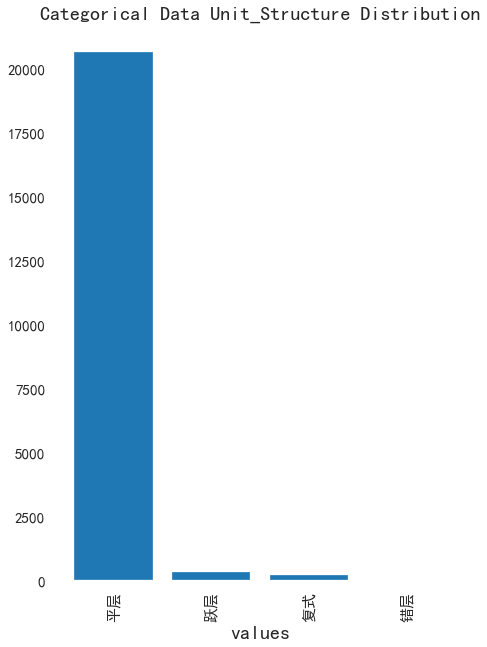

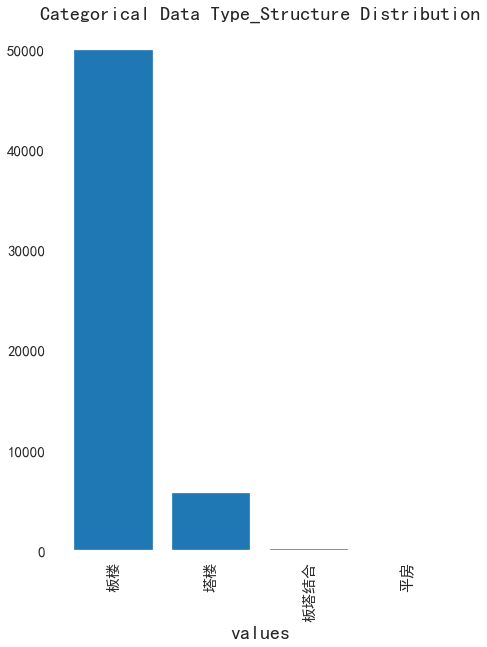

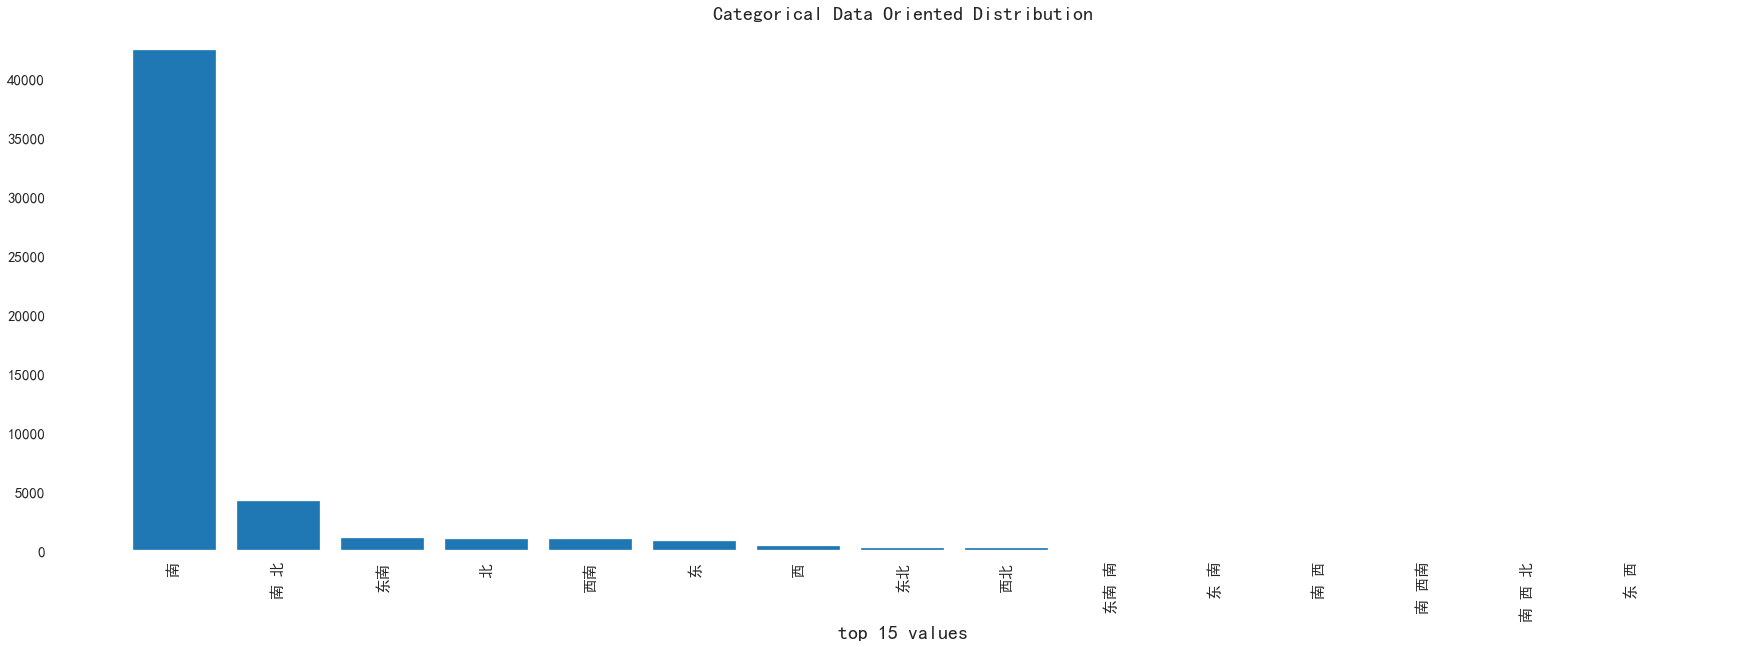

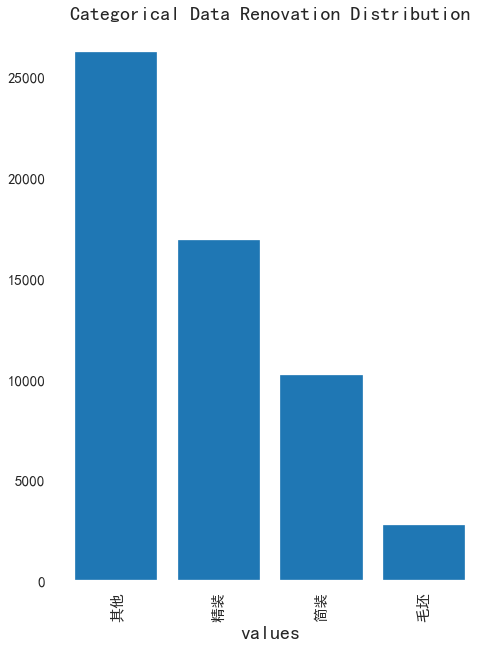

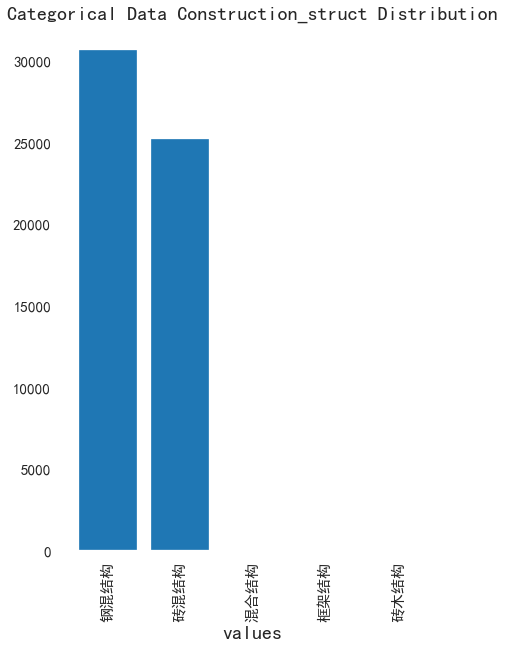

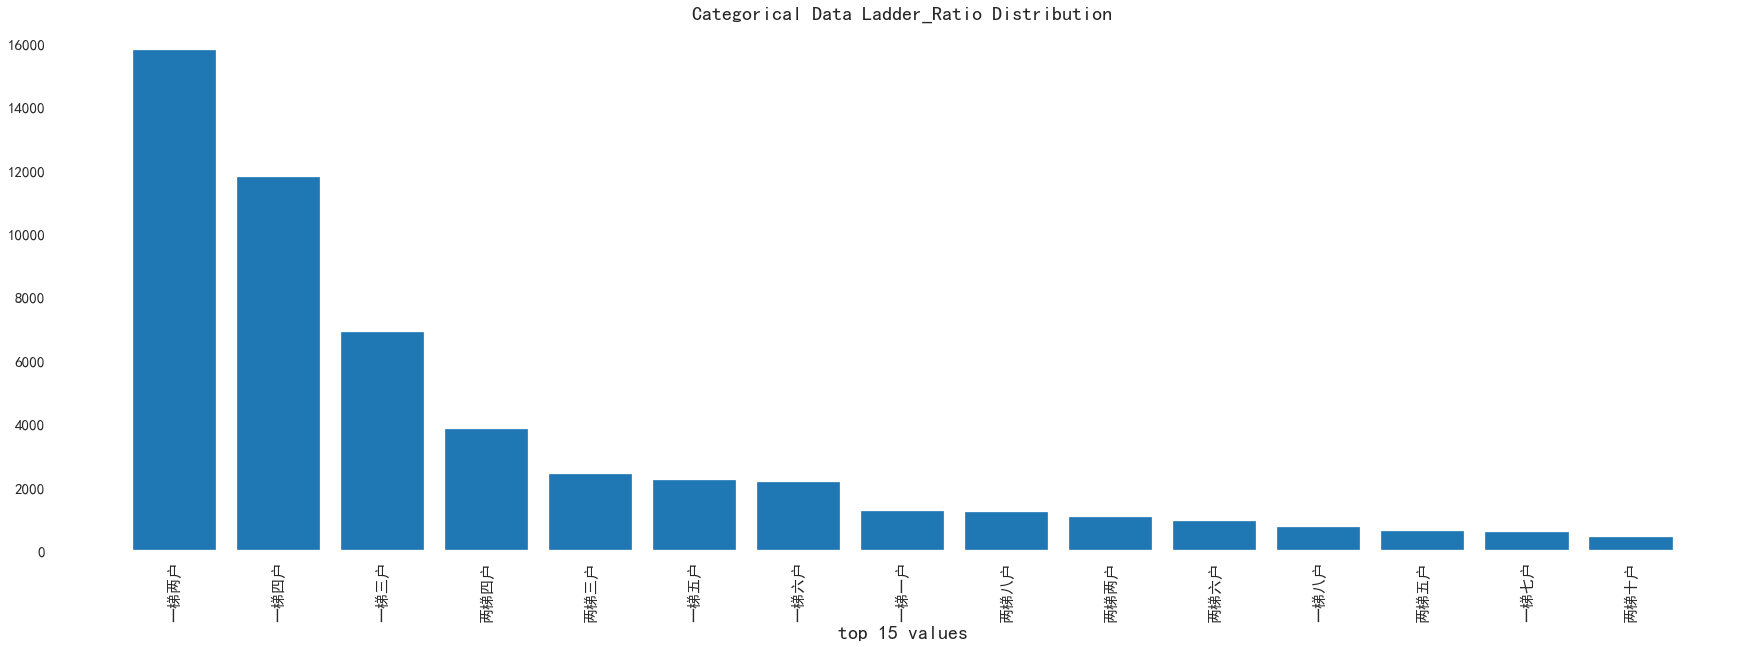

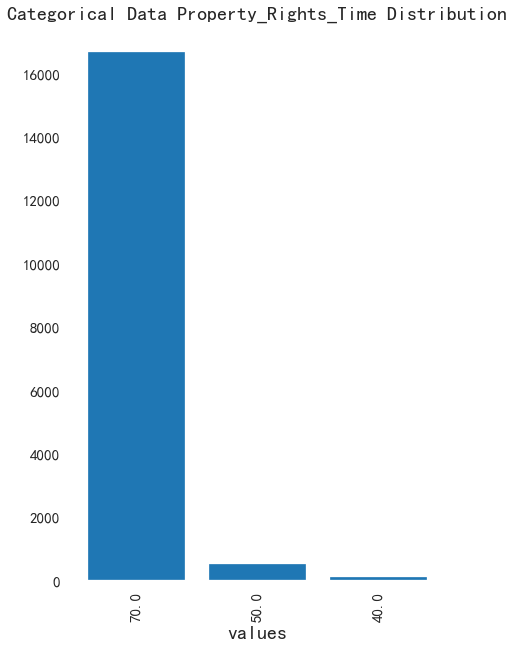

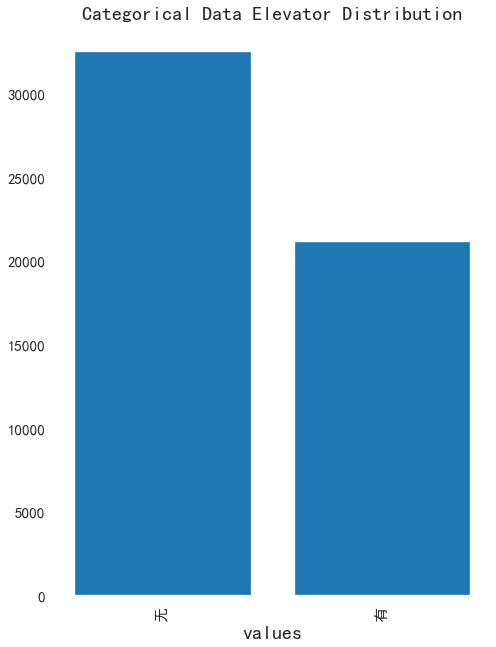

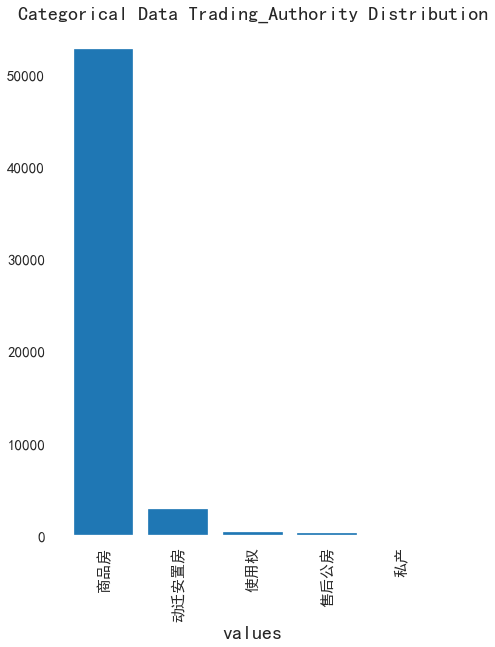

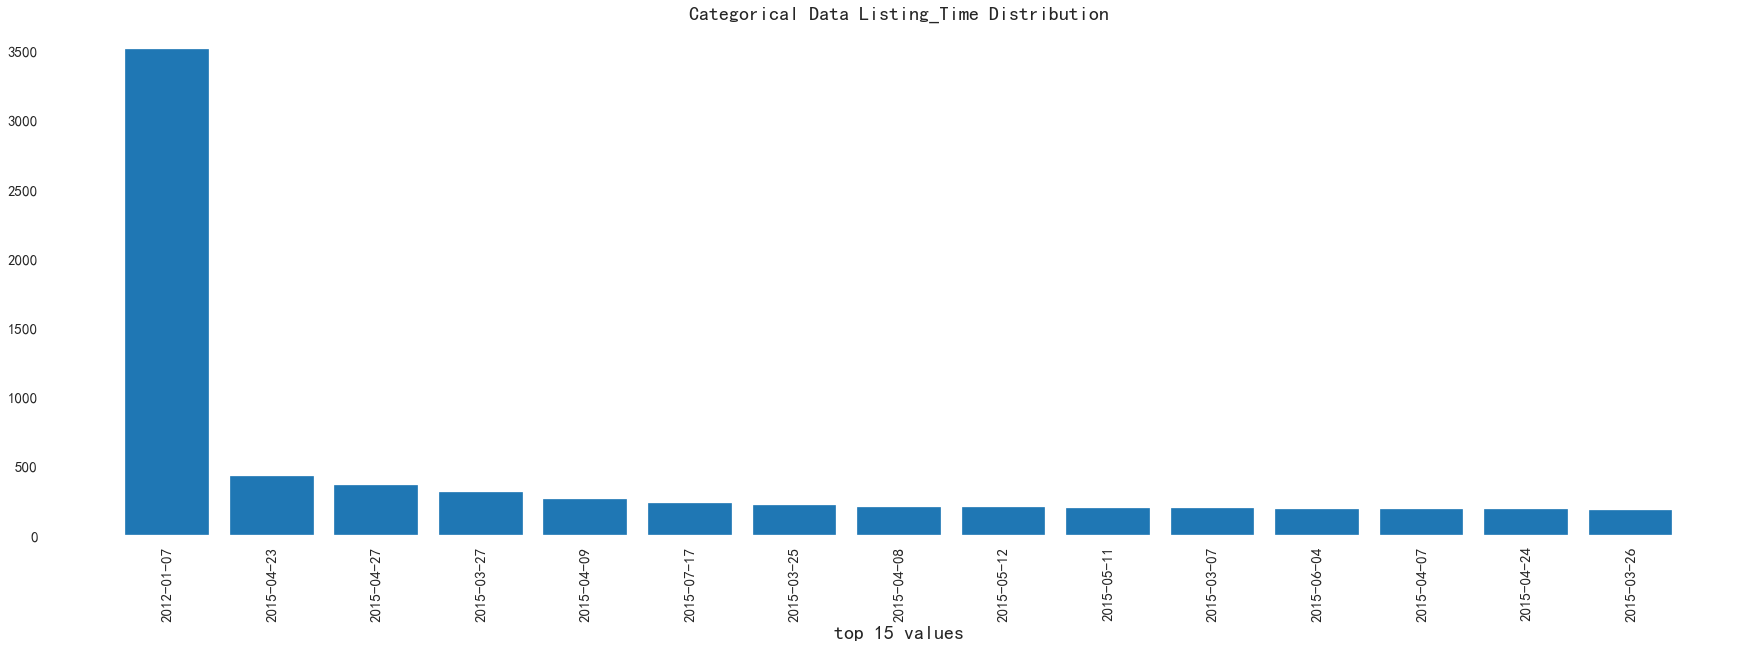

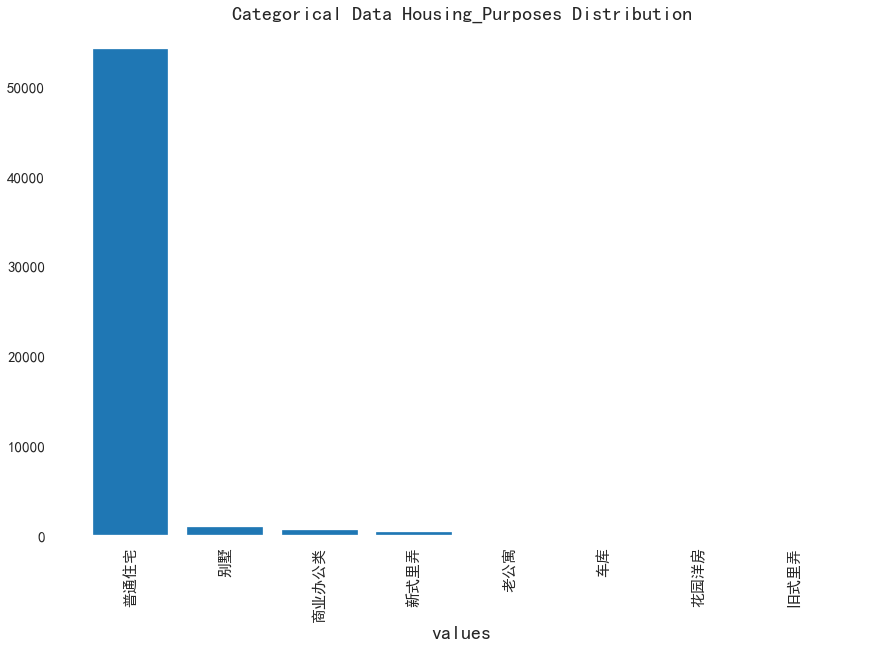

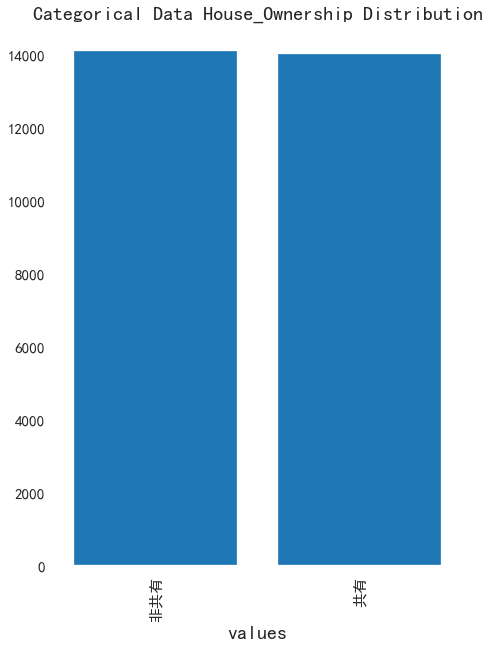

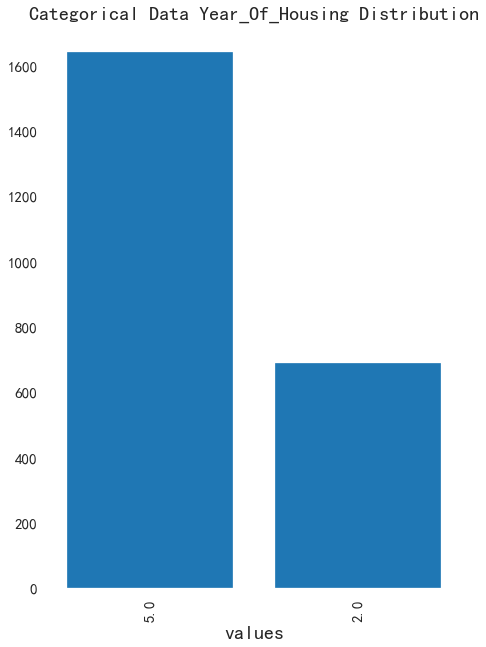

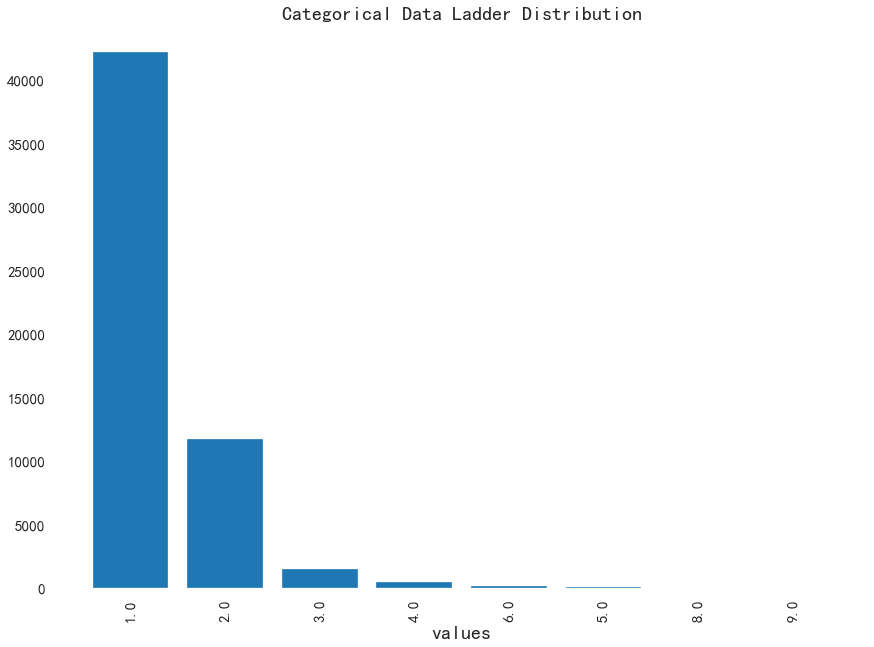

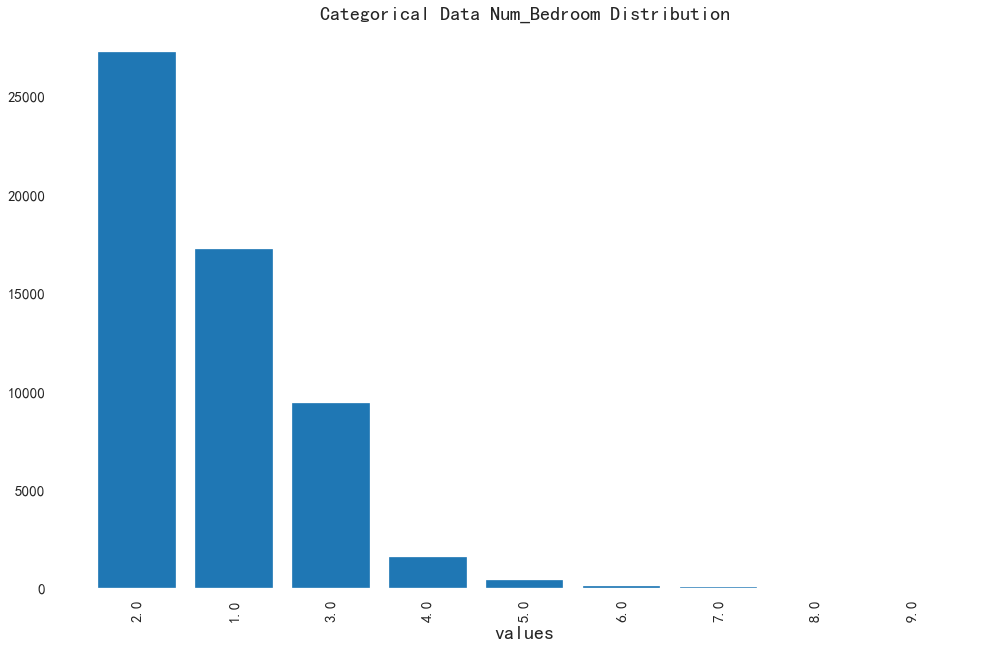

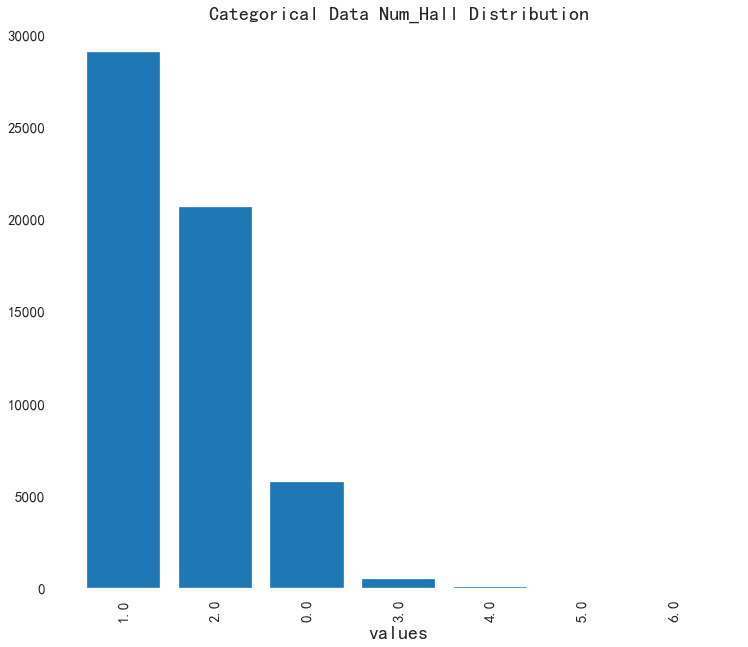

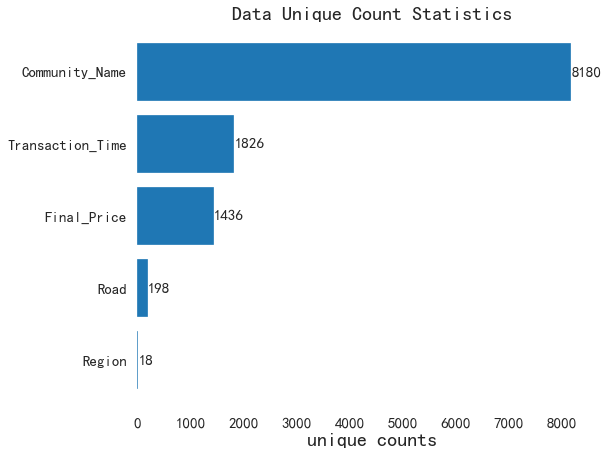

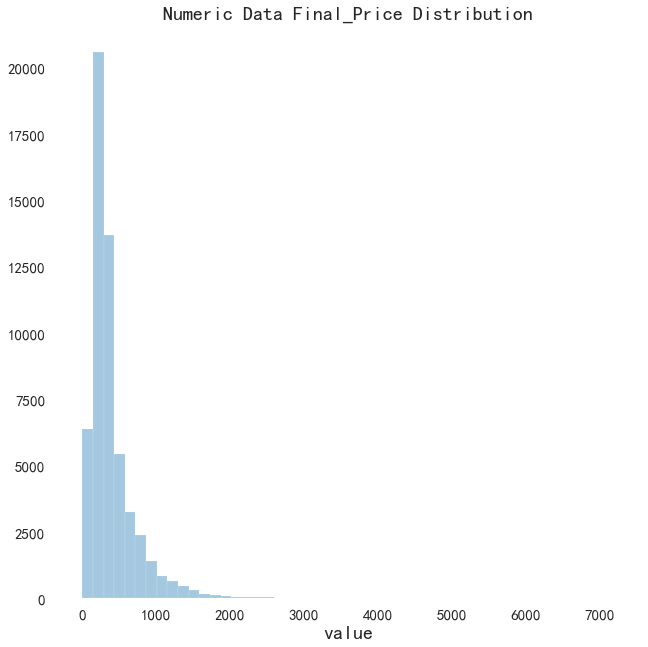

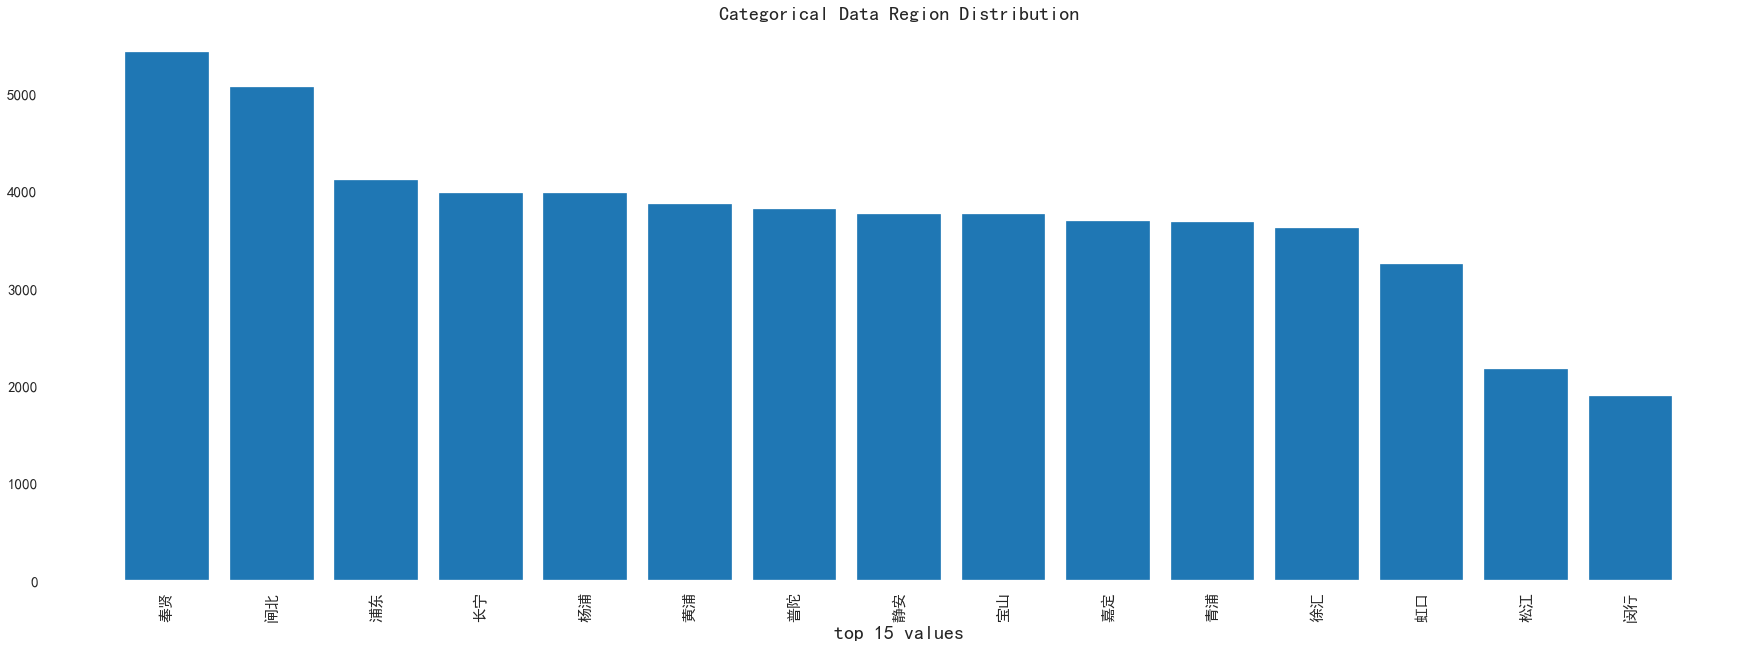

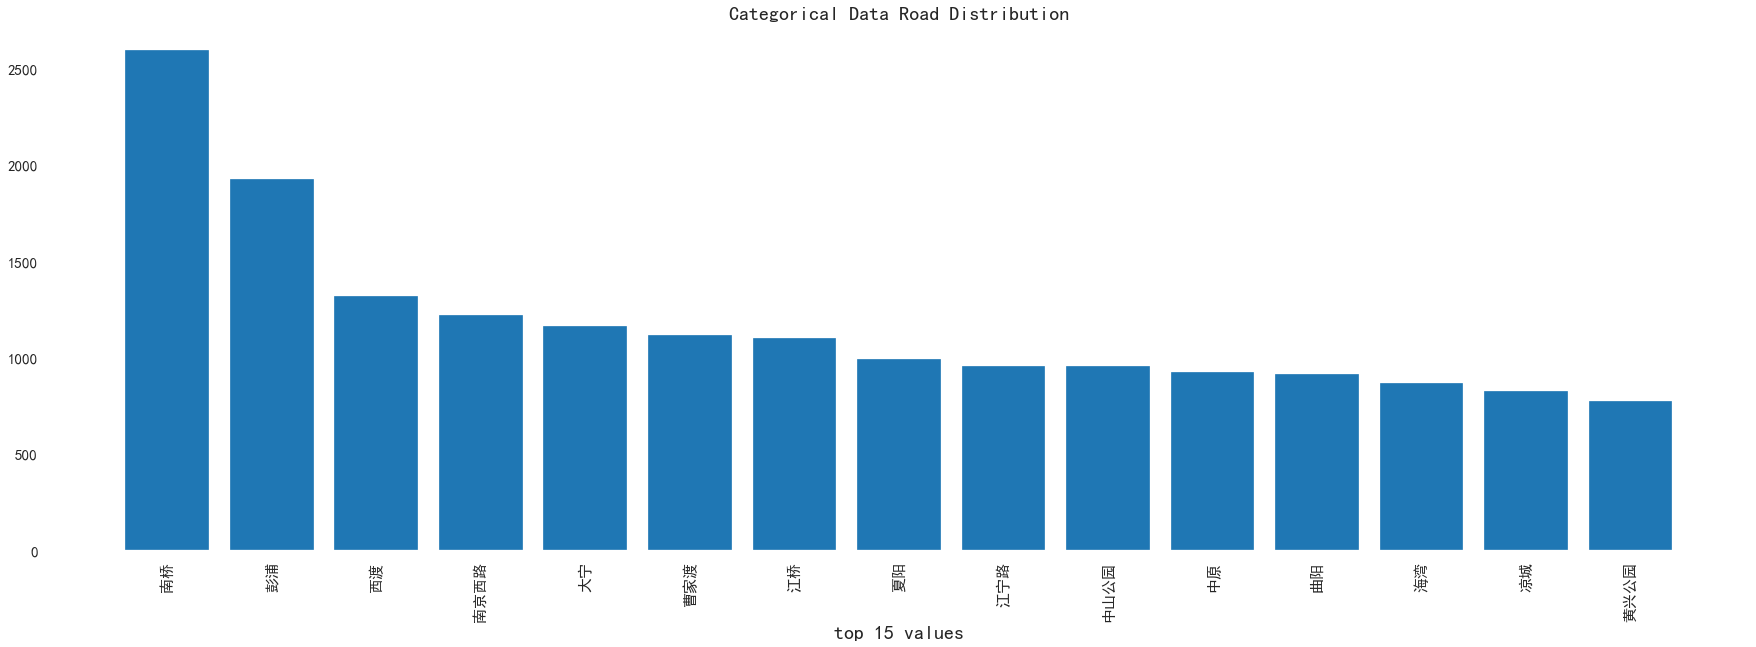

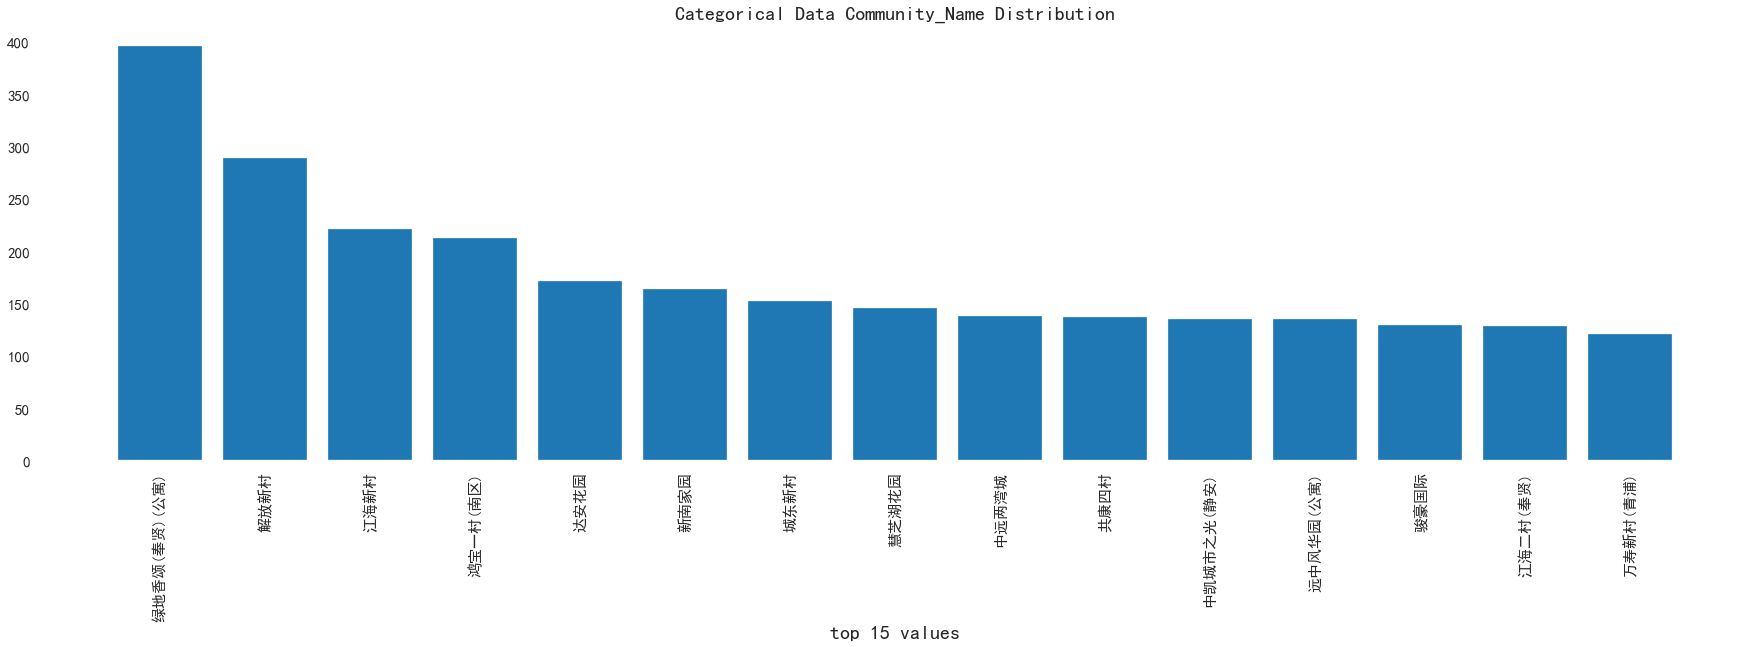

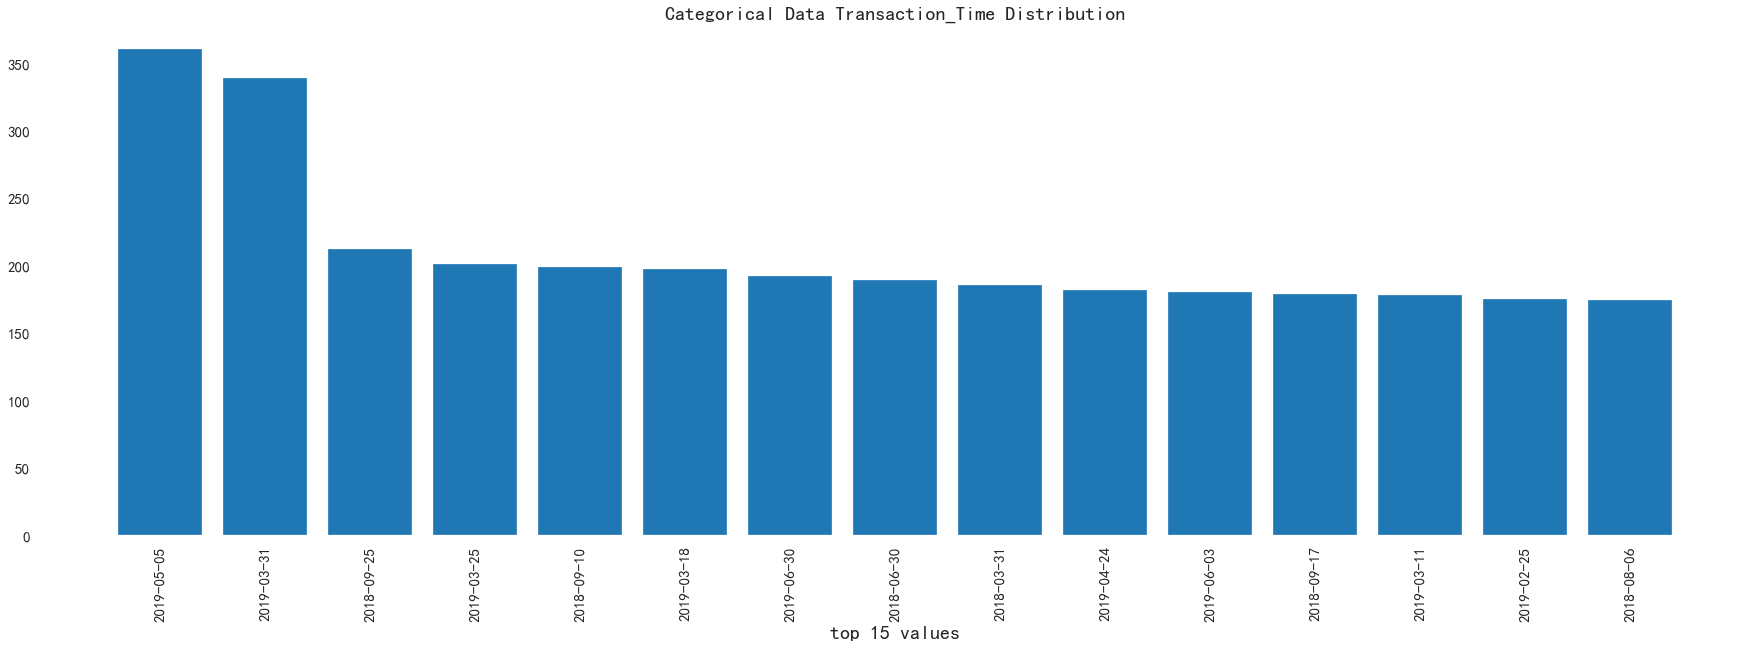

(56126, 5)
Parameter_path Store Finished


In [3]:
# 预处理
trend_preprocess(data_input_path, parameter_path)

**当已生成paramter.txt**

In [4]:
# 预处理
trend_preprocess(data_input_path, parameter_path)

Parameter_path Already Store


### 2. trend_qualified

In [5]:
# 数据处理（去重与缺失）
trend_qualified(data_input_path, data_qualified_path, parameter_path)

==== 数据去重开始 ====
去重前数据规格：(56126, 35)
去重后数据规格：(54738, 35)
==== 数据去重结束 ====
特征调整后数据规格：(54738, 5)
==== 数据缺失处理开始 ====
处理后数据规格：(54734, 5)
==== 数据缺失处理结束 ====


### 3. trend_dataset

In [6]:
# 数据集生成
trend_dataset(data_qualified_path, dataset_path, parameter_path, index_path)

Parameter_path Read Finished
Note: missing value in ['std']
Note: missing value in ['std']
Note: missing value in ['std']
Dataset Store Finished


### 以上步骤正常运行

### 数据集检查

In [7]:
# index
import pandas as pd
index = pd.read_csv(index_path)
index

,Group,Timedelta,Scope
0,All,7,"['2019-07-17', '2019-02-11']"
1,All,15,"['2019-07-17', '2014-11-08']"
2,All,month,"[['2019-07', '2012-12']]"
3,All,year,"[['2019', '2011']]"
4,Region==徐汇,7,"['2019-07-17', '2019-02-11']"
5,Region==徐汇,month,"[['2019-07', '2018-12']]"
6,Region==徐汇,year,"[['2019', '2016']]"
7,Region==长宁,7,"['2019-07-17', '2019-02-12']"
8,Region==长宁,15,"['2019-07-17', '2018-04-30']"
9,Region==长宁,month,"[['2019-07', '2017-09']]"


In [9]:
# dataset
data = pd.read_csv(dataset_path+'dataset_1.csv', index_col=0)
data.head()

,median,mean,sum,max,min,std,counts
2014-11-10,745.0,745.000000,1490.0,1050.0,440.0,431.335137,2
2014-11-25,830.0,830.000000,1660.0,1160.0,500.0,466.690476,2
2014-12-10,375.0,428.133333,6422.0,850.0,1.0,269.888831,15
2014-12-25,371.0,408.500000,8987.0,1100.0,5.0,261.546818,22
2015-01-09,420.0,504.176471,8571.0,1199.0,195.0,291.821700,17


In [10]:
# 或者这样调用dataset
num = 1    # 通过index选出想读取的数据集
data_path = dataset_path + 'dataset_' + str(num) + '.csv'
data = pd.read_csv(dataset_path+'dataset_1.csv', index_col=0)
data.head()

,median,mean,sum,max,min,std,counts
2014-11-10,745.0,745.000000,1490.0,1050.0,440.0,431.335137,2
2014-11-25,830.0,830.000000,1660.0,1160.0,500.0,466.690476,2
2014-12-10,375.0,428.133333,6422.0,850.0,1.0,269.888831,15
2014-12-25,371.0,408.500000,8987.0,1100.0,5.0,261.546818,22
2015-01-09,420.0,504.176471,8571.0,1199.0,195.0,291.821700,17
